# Gradient Descent
There are two types of 3 GD
1. Stochastic GD
2. Batch GD
3. Mini Batch

In [3]:
from sklearn.datasets import make_classification
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   y       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None


<Axes: xlabel='X1', ylabel='X2'>

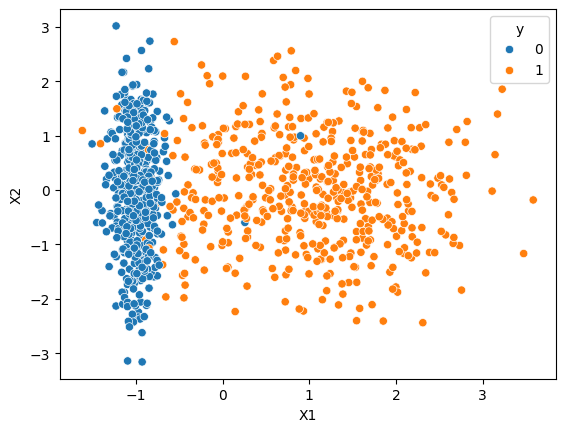

In [28]:
X, y = make_classification(
  n_samples = 1000,
  n_features = 2,
  n_informative = 1,
  n_redundant = 0,
  n_repeated = 0,
  n_classes = 2,
  n_clusters_per_class = 1

)

dataset = pd.DataFrame(X)

dataset.columns = ['X1', 'X2']

dataset['y'] = y

print(dataset.info())

sns.scatterplot(x='X1',y='X2',hue='y', data=dataset)



# X = dataset.iloc[:, 0,2]
# y= dataset.iloc[:,-1]

In [31]:
X = dataset.iloc[:,0:2]
y = dataset.iloc[:,-1]


In [36]:
print(X.head())
print()
print(y.head())

         X1        X2
0 -0.814485  1.115675
1  0.325908  0.467967
2 -1.289886 -0.433017
3  1.993293  0.610856
4  0.998216  1.764316

0    0
1    1
2    0
3    1
4    1
Name: y, dtype: int64


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [39]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Stochastic GD
In Stochastic GD we are updating the values of weights and biasws in every iteration.
1. **Advantage**
It gives accuarte values of weights and biases, because it is changing the values of weights and biases in every iteration.
2. **Disadvanage**
If the dataSet is very huge it might take very long time to run the model.

In [40]:
 model = Sequential()

 model.add(Dense(10, activation='relu', input_dim=2))
 model.add(Dense(10, activation='relu'))
 model.add(Dense(10, activation='relu'))
 model.add(Dense(10, activation='relu'))
 model.add(Dense(10, activation='relu'))
 model.add(Dense(10, activation='relu'))
 model.add(Dense(10, activation='relu'))

# If it is Binary Classificaition we will use in the last layer Sigmoid
# If it is multiclass classification we will use softmax

 model.add(Dense(1, activation='sigmoid'))


In [41]:
# 10 nodes * 2 Input Features = 20 + 10 biases = 30 Parameters for the first layer and so on for the rest of the layers.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [43]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()

# We made the batch size as 1 hence we have made it an Stochastic GD, as in each iteration is is updating the Values of Weights & Biases


history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/100
800/800 [==============================] - 4s 3ms/step - loss: 0.1821 - accuracy: 0.9688 - val_loss: 0.1511 - val_accuracy: 0.9800
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1798 - accuracy: 0.9688 - val_loss: 0.1489 - val_accuracy: 0.9700
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1795 - accuracy: 0.9737 - val_loss: 0.1419 - val_accuracy: 0.9800
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1585 - accuracy: 0.9638 - val_loss: 0.1455 - val_accuracy: 0.9800
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1543 - accuracy: 0.9700 - val_loss: 0.2727 - val_accuracy: 0.9700
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1776 - accuracy: 0.9700 - val_loss: 0.1379 - val_accuracy: 0.9700
Epoch 7/100
800/800 [==============================] - 3s 3ms/step - loss: 0.1754 - accuracy: 0.9688 - val_loss: 0.1464 - val_accuracy: 0.9800

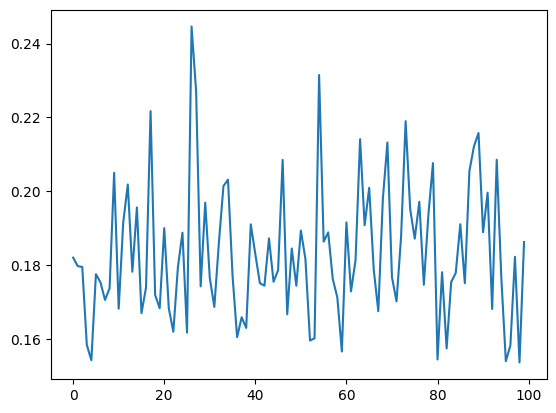

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

# Batch GD
In this we set the the batch size and set that after this many iterations we will change the values of Weights and Biases

1. **Advantage**
It is able to run the model faster, because it not updating in every iteration
2. **Disadvantage** It is not as optimal as the Stochastic GD

3. **InterView Quesiton** We set the values of Batch sized in multiples of 2 becasue it is more efficient with the ram optimisation


In [45]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

## See we have set the batch size over here
history = model.fit(X_scaled,y,epochs=100,batch_size=250,validation_split=0.2)


Epoch 1/100
4/4 [==============================] - 1s 63ms/step - loss: 0.6490 - accuracy: 0.6612 - val_loss: 0.6384 - val_accuracy: 0.7650
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6379 - accuracy: 0.7638 - val_loss: 0.6304 - val_accuracy: 0.7800
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6303 - accuracy: 0.7975 - val_loss: 0.6235 - val_accuracy: 0.8150
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6234 - accuracy: 0.8175 - val_loss: 0.6167 - val_accuracy: 0.8250
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6169 - accuracy: 0.8313 - val_loss: 0.6106 - val_accuracy: 0.8300
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6107 - accuracy: 0.8425 - val_loss: 0.6045 - val_accuracy: 0.8300
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6045 - accuracy: 0.8612 - val_loss: 0.5983 - val_accuracy: 0.8500
Epoch 8/100
4/4 [===

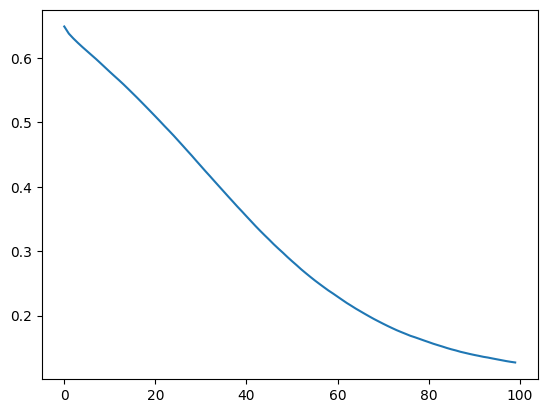

In [50]:
plt.plot(history.history['loss'])